In [6]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('../input/cat_train.csv')

In [8]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


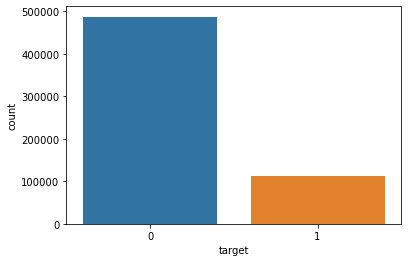

In [9]:
sns.countplot(df.target)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [12]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [16]:
mapping = {
    'Freezing': 0,
    'Warm': 1,
    'Cold':2,
    'Boiling Hot': 3,
    'Hot': 4,
    'Lava Hot': 5
}

In [18]:
df.loc[:, 'ord_2'] = df.ord_2.map(mapping)

In [19]:
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

In [23]:
import pandas as pd
from sklearn import preprocessing

# read training data
train = pd.read_csv('../input/cat-in-the-dat-ii/train.csv')

# read test data
test = pd.read_csv('../input/cat-in-the-dat-ii/test.csv')

# create a fake target column for test data
# since this column doesn't exist
test.loc[:, 'target'] = -1

# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)

# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ['id', 'target']]

# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()

    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!!!!!
    temp_col = data[feat].fillna('NONE').astype(str).values

    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
  temp_col = data[feat].fillna('NONE').astype(str).values

    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)

# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

In [24]:
df.ord_4.fillna('NONE').value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [25]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0,0,3,5,3,6,...,27,2,0,3,3,21,57,5,5,0
1,1,1,1,0,0,2,3,4,0,5,...,2113,2,2,6,5,24,151,6,9,0
2,2,0,1,0,0,0,3,1,3,0,...,1400,2,4,2,14,16,106,4,11,0
3,3,2,0,0,0,0,3,0,3,3,...,2168,0,5,4,1,2,46,2,5,0
4,4,0,2,0,2,0,3,6,3,2,...,1748,2,2,1,8,2,51,4,3,0


In [29]:
df.ord_4 = df.ord_4.fillna('NONE')

In [32]:
df.loc[
    df['ord_4'].value_counts()[df['ord_4']]
]

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
32897,32897,0.0,0.0,0.0,T,N,Red,Polygon,Axolotl,India,...,12a05fa54,1.0,Expert,1.0,o,A,PS,4.0,8.0,0
32347,32347,1.0,NaN,1.0,F,Y,Blue,Trapezoid,Lion,India,...,f49300b5a,2.0,Expert,1.0,n,M,hT,2.0,9.0,1
37890,37890,1.0,0.0,0.0,F,Y,Red,Trapezoid,Lion,Russia,...,2a1fb1d0a,3.0,Novice,1.0,b,R,IA,1.0,7.0,0
32112,32112,0.0,0.0,0.0,F,Y,Blue,Triangle,Axolotl,Russia,...,45ffa11c1,1.0,Contributor,4.0,f,B,fV,1.0,11.0,0
32112,32112,0.0,0.0,0.0,F,Y,Blue,Triangle,Axolotl,Russia,...,45ffa11c1,1.0,Contributor,4.0,f,B,fV,1.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,33045,0.0,0.0,0.0,T,Y,Blue,Circle,Dog,Costa Rica,...,NaN,3.0,Novice,1.0,a,E,rg,2.0,5.0,0
39978,39978,0.0,0.0,0.0,T,N,Red,NaN,Dog,India,...,1557c9d3a,2.0,Grandmaster,5.0,NaN,O,TL,5.0,5.0,0
31189,31189,0.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Russia,...,2af6f730a,1.0,Contributor,4.0,n,Q,tn,NaN,7.0,1
32347,32347,1.0,NaN,1.0,F,Y,Blue,Trapezoid,Lion,India,...,f49300b5a,2.0,Expert,1.0,n,M,hT,2.0,9.0,1


In [30]:
df.loc[
    df['ord_4'].value_counts()[df['ord_4']].values < 2000,
    'ord_4'
] 

288       J
291       L
368       L
589       J
603       L
         ..
599073    J
599251    J
599252    J
599356    J
599568    L
Name: ord_4, Length: 3607, dtype: object

In [38]:
df['ord_4'].value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [ ]:
df.loc[
    df['ord_4'].value_counts()[df['ord_4']].values < 2000,
    'ord_4'
] = 'RARE'

In [40]:
df = pd.read_csv('../input/cat_train_folds.csv')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,kfold
0,344453,0.0,0.0,1.0,NaN,Y,Red,Circle,Hamster,Finland,...,2.0,Novice,Freezing,i,Q,NS,2.0,5.0,0,0
1,420949,0.0,0.0,0.0,F,Y,NaN,Trapezoid,Dog,Costa Rica,...,3.0,Master,Lava Hot,d,T,cy,6.0,2.0,0,0
2,488582,0.0,0.0,0.0,T,N,Red,Trapezoid,Snake,Costa Rica,...,3.0,Contributor,Freezing,k,B,fV,1.0,2.0,0,0
3,272076,0.0,0.0,0.0,T,N,Red,Triangle,Cat,Finland,...,3.0,Novice,Lava Hot,m,NaN,jp,2.0,12.0,1,0
4,475142,0.0,0.0,0.0,F,Y,Blue,Polygon,Dog,Canada,...,1.0,Grandmaster,Warm,b,Y,vq,6.0,7.0,0,0


In [41]:
df.kfold.value_counts()

4    120000
3    120000
2    120000
1    120000
0    120000
Name: kfold, dtype: int64

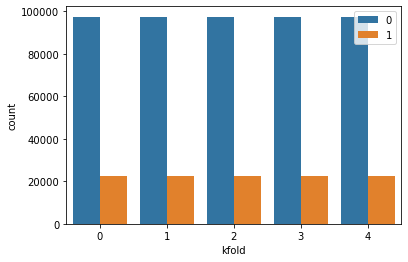

In [44]:
sns.countplot(df.kfold, hue=df.target.values)